In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#   !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
FuelConsumption="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
# Reading CSV file and fetching top 5 records
df=pd.read_csv(FuelConsumption)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
#Data explore
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# correlation
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


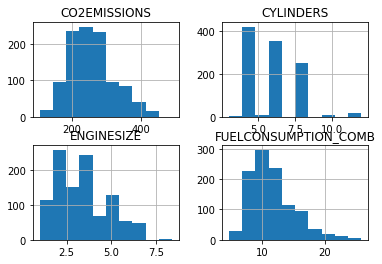

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Text(0, 0.5, 'CO2')

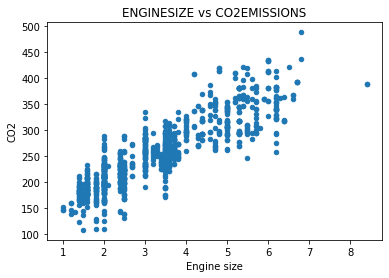

In [8]:
df[['CO2EMISSIONS','ENGINESIZE']].plot(x="ENGINESIZE",y="CO2EMISSIONS",kind="scatter", title="ENGINESIZE vs CO2EMISSIONS")
plt.xlabel("Engine size")
plt.ylabel("CO2")

Text(0, 0.5, 'CO2 Emissions')

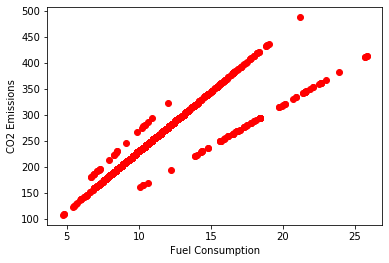

In [15]:
plt.scatter(df["FUELCONSUMPTION_COMB"],df["CO2EMISSIONS"],color="red")
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")

In [20]:
# Create models
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(df[['ENGINESIZE']],df["CO2EMISSIONS"])
yhat=regr.predict(df[['ENGINESIZE']])

In [22]:
print(regr.coef_, regr.intercept_)yhat,df["CO2EMISSIONS"]

[39.12519979] 125.3040994953569


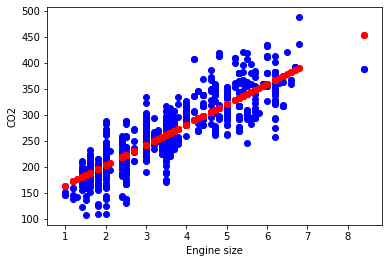

In [24]:
plt.scatter(df["ENGINESIZE"],df["CO2EMISSIONS"],color="blue")
plt.scatter(df["ENGINESIZE"],yhat,color="red")
plt.xlabel("Engine size")
plt.ylabel("CO2")
plt.show()

In [32]:
from sklearn.metrics import r2_score
r2_score(df["CO2EMISSIONS"],yhat)

0.7641458597854816

In [31]:
regr.score(df[["ENGINESIZE"]],df["CO2EMISSIONS"])
# r square =1 means that model fits data
#R-squared is not error, but is a popular metric for accuracy of your model. 
#It represents how close the data are to the fitted regression line. 
#The higher the R-squared, the better the model fits your data. 
#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

0.7641458597854816

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df["CO2EMISSIONS"],yhat)
#Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. 
#It’s more popular than Mean absolute error because the focus is geared more towards large errors. 
#This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

946.3140527188749